# 10. Martingale Convergence

**Goal:** Simulate martingales and observe a.s. convergence.

**Doob's Martingale Convergence:** If $M_n$ is a martingale bounded in $L^1$, then $M_n \to M_\infty$ a.s.

In [1]:
import numpy as np
import matplotlib.pyplot as plt

## Polya Urn Model

Start with 1 red and 1 blue ball. Draw a ball, replace it with 2 of the same color.
The fraction of red balls $M_n = R_n/(R_n+B_n)$ is a martingale converging to a $\text{Uniform}(0,1)$ limit.

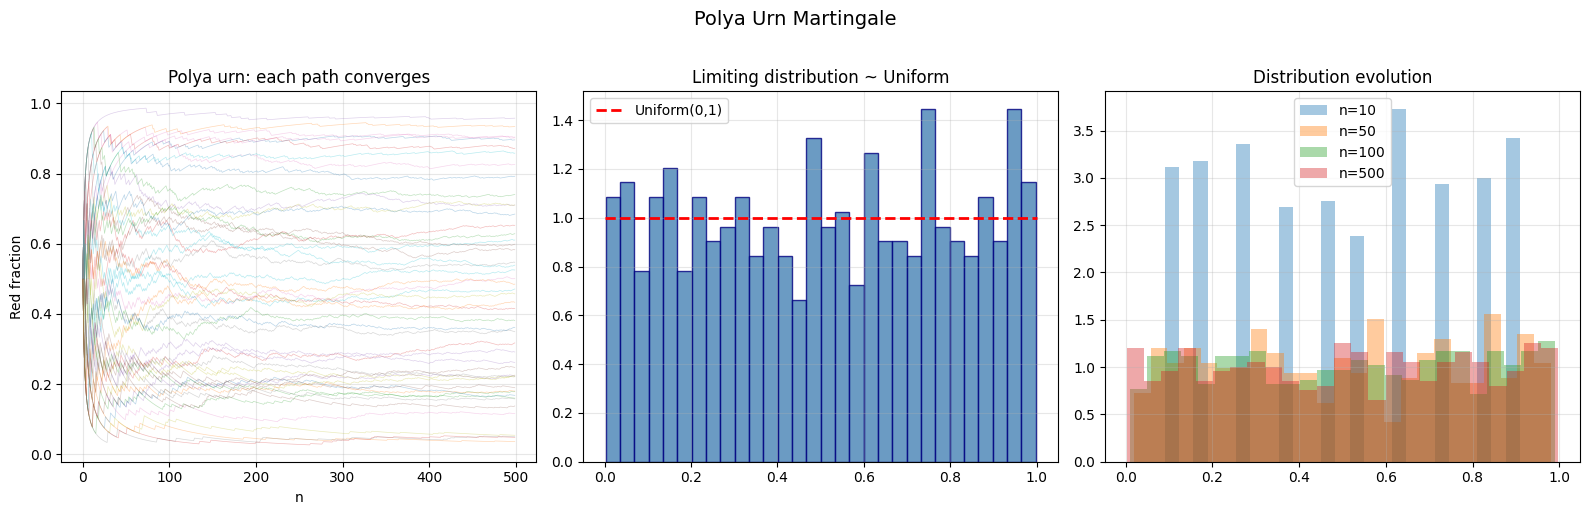

In [2]:
np.random.seed(42)
n_steps = 500
n_paths = 500

red = np.ones(n_paths)
blue = np.ones(n_paths)
fractions = np.zeros((n_paths, n_steps))

for t in range(n_steps):
    fractions[:, t] = red / (red + blue)
    prob_red = red / (red + blue)
    draw_red = np.random.uniform(0, 1, n_paths) < prob_red
    red += draw_red
    blue += ~draw_red

fig, axes = plt.subplots(1, 3, figsize=(16, 5))
ax = axes[0]
for i in range(min(50, n_paths)):
    ax.plot(fractions[i], alpha=0.3, linewidth=0.5)
ax.set_xlabel('n'); ax.set_ylabel('Red fraction')
ax.set_title('Polya urn: each path converges', fontsize=12)
ax.grid(True, alpha=0.3)

ax = axes[1]
ax.hist(fractions[:, -1], bins=30, density=True, color='steelblue', edgecolor='navy', alpha=0.8)
ax.plot(np.linspace(0,1,100), np.ones(100), 'r--', linewidth=2, label='Uniform(0,1)')
ax.set_title('Limiting distribution ~ Uniform', fontsize=12)
ax.legend(); ax.grid(True, alpha=0.3)

ax = axes[2]
for t in [10, 50, 100, 500]:
    idx = min(t-1, n_steps-1)
    ax.hist(fractions[:, idx], bins=25, alpha=0.4, density=True, label=f'n={t}')
ax.set_title('Distribution evolution', fontsize=12)
ax.legend(); ax.grid(True, alpha=0.3)
plt.suptitle('Polya Urn Martingale', fontsize=14, y=1.02)
plt.tight_layout()
plt.show()

## Galton-Watson Branching Process

Each individual has Poisson($\lambda$) offspring. If $\lambda > 1$, $W_n = Z_n/\lambda^n$ is a non-negative martingale.

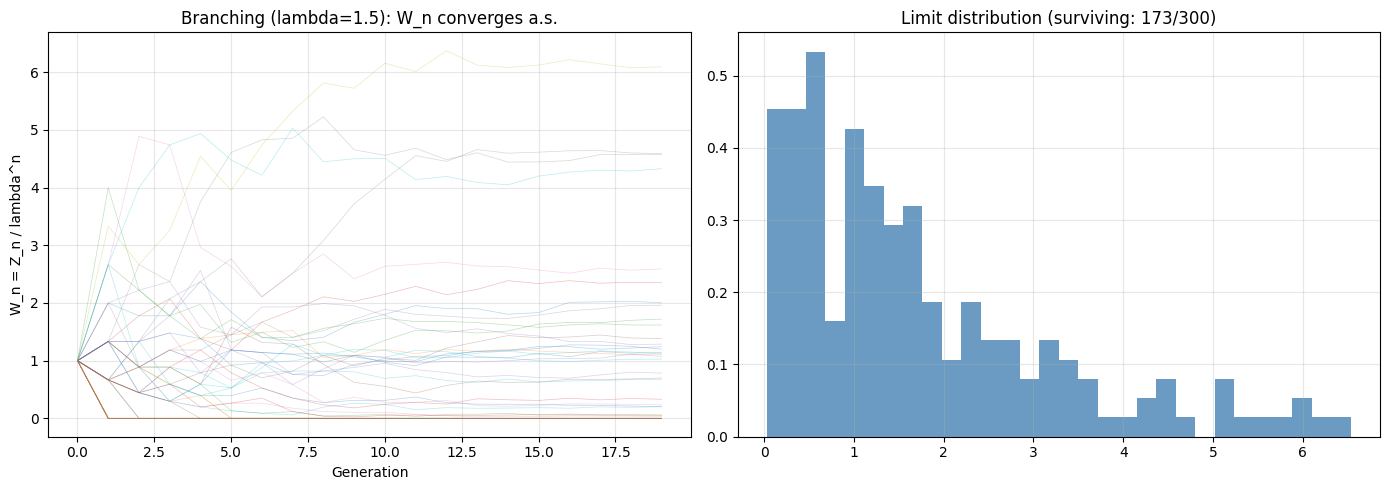

In [3]:
np.random.seed(42)
lam = 1.5
n_gen = 20
n_paths = 300

pop = np.ones(n_paths, dtype=int)
W = np.zeros((n_paths, n_gen))

for g in range(n_gen):
    W[:, g] = pop / lam**g
    new_pop = np.zeros(n_paths, dtype=int)
    for i in range(n_paths):
        if pop[i] > 0 and pop[i] < 100000:
            new_pop[i] = np.sum(np.random.poisson(lam, pop[i]))
        elif pop[i] >= 100000:
            new_pop[i] = int(pop[i] * lam)
    pop = new_pop

alive = W[:, -1] > 0.01
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 5))
for i in range(min(50, n_paths)):
    ax1.plot(W[i], alpha=0.3, linewidth=0.5)
ax1.set_xlabel('Generation'); ax1.set_ylabel('W_n = Z_n / lambda^n')
ax1.set_title(f'Branching (lambda={lam}): W_n converges a.s.', fontsize=12)
ax1.grid(True, alpha=0.3)

ax2.hist(W[alive, -1], bins=30, density=True, color='steelblue', alpha=0.8)
ax2.set_title(f'Limit distribution (surviving: {np.sum(alive)}/{n_paths})', fontsize=12)
ax2.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

## Key Takeaways

1. **Bounded martingales converge a.s.** (Doob's theorem).
2. **Polya urn:** fraction converges to a Uniform limit.
3. **Branching process:** normalized population converges to a non-degenerate limit (conditioned on survival).
4. Martingale convergence is the engine behind many results in probability.